<h1>Импорт библиотек

In [1]:
import numpy as np
import matplotlib.pyplot as plt

<h1>Задача 1. Дан набор из $p$ матриц размерностью $(n, n)$ и $p$ векторов размерностью $(n, 1)$, найти сумму произведений матриц на векторы. Написать тесты для кода

In [2]:
def sum_prod(X, V):
    '''
    X - матрицы (n, n)
    V - векторы (n, 1)
    Гарантируется, что len(X) == len(V)
    '''
    result = np.zeros((X[0].shape[0], 1))  # Инициализируем результирующий вектор (n, 1)
    for matrix, vector in zip(X, V):
        result += np.dot(matrix, vector)  # Умножаем матрицу на вектор и добавляем к результату

    return result

print("ТЕСТ 1\n",sum_prod([np.array([
[1, 2, 3],
[4, 5, 6],
[7, 8, 9]])],
[np.array([
[9],
[8],
[7]
])]) == np.array([
[46],
[118],
[190]])) # Пройден

print("ТЕСТ 2\n", sum_prod([np.array([
[1, 2, 3, 4],
[4, 3, 2, 1],
[5, 6, 7, 8],
[8, 7, 6, 5]]),
np.array([
[1, 2, 3, 4],
[4, 3, 2, 1],
[5, 6, 7, 8],
[8, 7, 6, 5]])],
[np.array([
[9],
[8],
[7],
[6]]),
np.array([
[6],
[7],
[8],
[9]])]) == np.array([
[150],
[150],
[390],
[390]])) # Пройден

ТЕСТ 1
 [[ True]
 [ True]
 [ True]]
ТЕСТ 2
 [[ True]
 [ True]
 [ True]
 [ True]]


<h1>Задача 2. Дана матрица M, напишите функцию, которая бинаризует матрицу по некоторому threshold (то есть, все значения большие threshold становятся равными 1, иначе 0). Напишите тесты для кода

In [3]:
def binarize(M, threshold=0.5):
  return np.where(M > threshold, 1, 0)

print(binarize(np.array([[0.33, 0.4, 0.68, 0.71, 0.5]]), 0.5) == np.array([0, 0, 1, 1, 0])) # Пройден

[[ True  True  True  True  True]]


<h1>Задача 3. Напишите функцию, которая возвращает уникальные элементы из каждой строки матрицы. Напишите такую же функцию, но для столбцов. Напишите тесты для кода

In [4]:
# В данном задании я считаю уникальными те элементы, которые встречаются в строке/столбце только один раз

def unique_rows(mat):
  result = []
  for row in mat:
    elements, counts = np.unique(row, return_counts=True)
    unique_elements = elements[counts == 1]
    result.append(list(unique_elements))
  return result

def unique_columns(mat):
    return unique_rows(mat.T)


matrix = np.array([[1, 2, 2, 3],
                  [1, 4, 3, 3],
                  [7, 8, 8, 6]])

print(unique_rows(matrix) == [[1, 3], [1, 4], [6, 7]])            # Пройден
print(unique_columns(matrix) == [[7], [2, 4, 8], [2, 3, 8], [6]]) # Пройден

True
True


<h1>Задача 4. Напишите функцию, которая заполняет матрицу с размерами $(m, n)$ случайными числами, распределенными по нормальному закону. Затем считает мат. ожидание и дисперсию для каждого из столбцов и строк, а также строит для каждой строки и столбца гистограмму значений (использовать функцию hist из модуля matplotlib.plot)

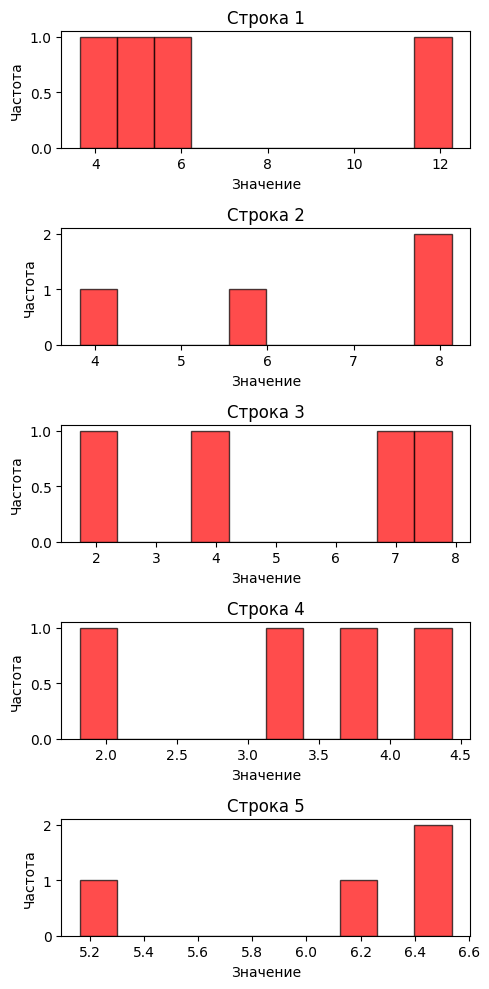

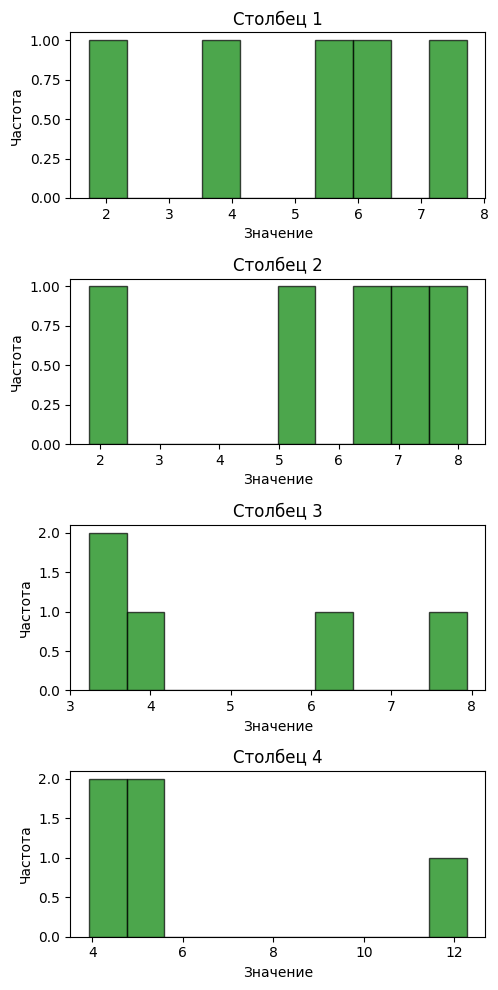

Матрица
 [[ 5.71789077  5.10582101  3.64292531 12.2688935 ]
 [ 7.71892309  8.13670325  3.8240509   5.59015072]
 [ 1.72624259  6.97198917  7.93585287  3.92669469]
 [ 3.66180079  1.81367545  3.23360577  4.4365349 ]
 [ 6.24304093  6.53643862  6.47045822  5.16287888]]
Математические ожидания столбцов:  [5.01357963 5.7129255  5.02137861 6.27703054]
Дисперсия столбцов:  [4.39208066 4.74216812 3.42477016 9.30541248]
Математические ожидания строк:  [6.68388265 6.31745699 5.14019483 3.28640423 6.10320416]
Дисперсия строк:  [10.96579666  3.00495313  6.07470671  0.90886022  0.3065834 ]


In [5]:
def generate_and_analyze_matrix(m, n, mean=0, stddev=1):
    matrix = np.random.normal(loc=mean, scale=stddev, size=(m, n))

    row_means = np.mean(matrix, axis=1)
    row_vars = np.var(matrix, axis=1)

    col_means = np.mean(matrix, axis=0)
    col_vars = np.var(matrix, axis=0)

    plt.figure(figsize=(5, 10))
    for i in range(m):
        plt.subplot(m, 1, i + 1)
        plt.hist(matrix[i, :], bins=10, alpha=0.7, color='red', edgecolor='black')
        plt.title(f'Строка {i + 1}')
        plt.xlabel('Значение')
        plt.ylabel('Частота')

    plt.tight_layout()
    plt.show()

    plt.figure(figsize=(5, 10))
    for j in range(n):
        plt.subplot(n, 1, j + 1)
        plt.hist(matrix[:, j], bins=10, alpha=0.7, color='green', edgecolor='black')
        plt.title(f'Столбец {j + 1}')
        plt.xlabel('Значение')
        plt.ylabel('Частота')

    plt.tight_layout()
    plt.show()

    return matrix, col_means, col_vars, row_means, row_vars

matrix, col_means, col_vars, row_means, row_vars = generate_and_analyze_matrix(m=5, n=4, mean=5, stddev=2)
print("Матрица\n", matrix)
print("Математические ожидания столбцов: ",col_means)
print("Дисперсия столбцов: ", col_vars)
print("Математические ожидания строк: ",row_means)
print("Дисперсия строк: ", row_vars)

<h1>Задача 5. Напишите функцию, которая заполняет матрицу $(m, n)$ в шахматном порядке заданными числами $a$ и $b$. Напишите тесты для кода

In [6]:
def chess(m, n, a, b):
    curr_sym = a
    res = np.empty((m, n), dtype=int)
    for i in range (0,m):
      for j in range(0,n):
        res[i][j] = curr_sym
        if j == n-1 and (j+1) % 2 == 0:
          continue
        if curr_sym == a:
          curr_sym = b
        else:
          curr_sym = a
    return res

print(chess(5,5,1,2) == np.array(
[[1, 2, 1, 2, 1],
 [2, 1, 2, 1, 2],
 [1, 2, 1, 2, 1],
 [2, 1, 2, 1, 2],
 [1, 2, 1, 2, 1]]))                   # Пройден

print(chess(1,1,1,2) == np.array(
[[1]]))                               # Пройден

print(len(chess(0,0,1,2)) == 0)       # Пройден

print(chess(2,2,5,6) == np.array(
[[5, 6],
 [6, 5]]))                            # Пройден

print(chess(2,4,3,2) == np.array(
[[3, 2, 3, 2],
 [2, 3, 2, 3],]))                     # Пройден

[[ True  True  True  True  True]
 [ True  True  True  True  True]
 [ True  True  True  True  True]
 [ True  True  True  True  True]
 [ True  True  True  True  True]]
[[ True]]
True
[[ True  True]
 [ True  True]]
[[ True  True  True  True]
 [ True  True  True  True]]


<h1>Задача 6. Напишите функцию, которая отрисовывает прямоугольник с заданными размерами (a, b) на изображении размера (m, n), цвет фона задайте в схеме RGB, как и цвет прямоугольника. Цвета также должны быть параметрами функции. Напишите аналогичную функцию но для овала с полуосями a и b. Напишите тесты для кода.
Примечание: уравнение эллипса (границы овала) можно записать как:
<h1>$\frac{(x-x_0)^2}{a^2}+\frac{(y-y_0)^2}{b^2}=1$

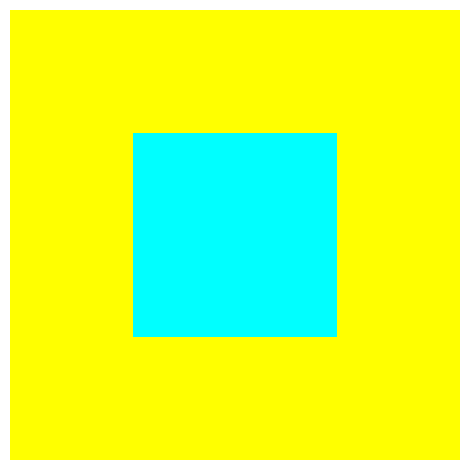

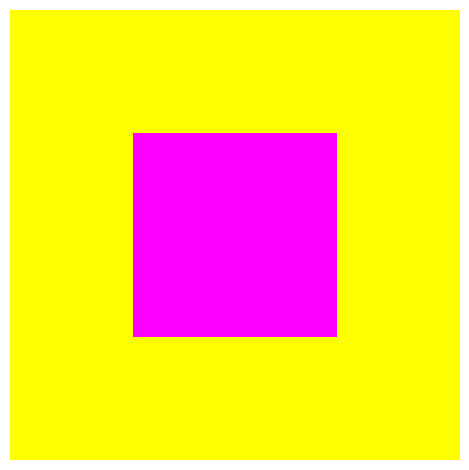

True
True
True


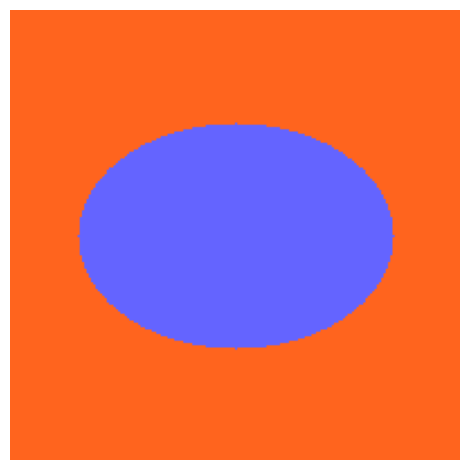

True


In [7]:
def draw_rectangle(a, b, m, n, rectangle_color, background_color):
  image = np.zeros((m, n, 3), dtype=np.uint8)
  image[:] = background_color

  start_r, start_c = (m - a) // 2, (n - b) // 2

  image[start_r:start_r + a, start_c:start_c + b] = rectangle_color

  plt.imshow(image)
  plt.axis('off')
  plt.tight_layout()
  plt.show()
  return image

def draw_ellipse(a, b, m, n, ellipse_color, background_color):
    image = np.zeros((m, n, 3), dtype=np.uint8)
    image[:] = background_color
    center_r, center_c = m // 2, n // 2

    for y in range(m):
        for x in range(n):
            if ((x - center_c) ** 2) / (b ** 2) + ((y - center_r) ** 2) / (a ** 2) <= 1:
              image[y, x, 0] = ellipse_color[0]
              image[y, x, 1] = ellipse_color[1]
              image[y, x, 2] = ellipse_color[2]

    plt.imshow(image)
    plt.axis('off')
    plt.tight_layout()
    plt.show()
    return image

# Этот тест позволяет проверить, что в центре изображения размером m x n
# находится прямоугольник a x b  с указанным rectangle_color
def check_rectangle(a, b, m, n, rectangle_color, image):
  start_r, start_c = (m - a) // 2, (n - b) // 2
  for i in range(start_r, start_r + a):
    for j in range(start_c, start_c + b):
        if image[i][j][0] != rectangle_color[0] or image[i][j][1] != rectangle_color[1] or image[i][j][2] != rectangle_color[2]:
          return False
  return True

# Этот тест позволяет проверить, что в центре изображения размером m x n
# находится эллипс a x b с указанным ellipse_color
def check_ellipse(a, b, m, n, ellipse_color, image):
  center_r, center_c = m // 2, n // 2
  for y in range(m):
    for x in range(n):
      if ((x - center_c) ** 2) / (b ** 2) + ((y - center_r) ** 2) / (a ** 2) <= 1:
        if image[y, x, 0] != ellipse_color[0] or image[y, x, 1] != ellipse_color[1] or image[y, x, 2] != ellipse_color[2]:
          return False
  return True


img = draw_rectangle(5,5,11,11,(0,255,255), (255,255,0))
img2 = draw_rectangle(5,5,11,11,(255,0,255), (255,255,0))
print(check_rectangle(5,5,11,11,(0,255,255), img) == True)  # Пройден
print(check_rectangle(5,5,11,11,(255,0,255), img) == False) # Пройден
print(check_rectangle(5,5,11,11,(255,0,255), img2) == True) # Пройден

img = draw_ellipse(50,70,200,200,(100,100,255), (255,100,30))
print(check_ellipse(50,70,200,200,(100,100,255), img) == True)      # Пройден

<h1>Задача 7. Дан некий временной ряд. Для данного ряда нужно найти его: математическое ожидание, дисперсию, СКО, найти все локальные максимумы и минимумы (локальный максимум - это точка, которая больше своих соседних точек, а локальный минимум - это точка, которая меньше своих соседей), а также вычислить для данного ряда другой ряд, получаемый методом скользящего среднего с размером окна $p$.
<h1>Примечание: метод скользящего среднего подразумевает нахождение среднего из подмножетсва ряда размером $p$

In [8]:
def analyze_time_series(time_series, p):
    stdev, mean, var = np.std(time_series), np.mean(time_series), np.var(time_series)
    local_min = np.where((time_series[1:-1] < time_series[:-2]) & (time_series[1:-1] < time_series[2:]))[0] + 1
    local_max = np.where((time_series[1:-1] > time_series[:-2]) & (time_series[1:-1] > time_series[2:]))[0] + 1
    smoothed = np.convolve(time_series, np.ones(p)/p, 'valid')
    return  stdev, local_max, local_min, mean, var, smoothed

stdev, local_max, local_min, mean, var, smoothed = analyze_time_series([5,10,4,5,4,2,6], 3)

print("Дисперсия:", var)
print("Стандартное отклонение:", stdev)
print("Математическое ожидание:", mean)
print("Локальные максимумы:", local_max)
print("Локальные минимумы:", local_min)
print("Скользящее среднее:", smoothed)

Дисперсия: 5.265306122448979
Стандартное отклонение: 2.2946254863155726
Математическое ожидание: 5.142857142857143
Локальные максимумы: [1]
Локальные минимумы: []
Скользящее среднее: [6.33333333 6.33333333 4.33333333 3.66666667 4.        ]


<ipython-input-8-ed6e9c87ab31>:3: DeprecationWarning: Calling nonzero on 0d arrays is deprecated, as it behaves surprisingly. Use `atleast_1d(cond).nonzero()` if the old behavior was intended. If the context of this warning is of the form `arr[nonzero(cond)]`, just use `arr[cond]`.
  local_min = np.where((time_series[1:-1] < time_series[:-2]) & (time_series[1:-1] < time_series[2:]))[0] + 1
<ipython-input-8-ed6e9c87ab31>:4: DeprecationWarning: Calling nonzero on 0d arrays is deprecated, as it behaves surprisingly. Use `atleast_1d(cond).nonzero()` if the old behavior was intended. If the context of this warning is of the form `arr[nonzero(cond)]`, just use `arr[cond]`.
  local_max = np.where((time_series[1:-1] > time_series[:-2]) & (time_series[1:-1] > time_series[2:]))[0] + 1


<h1> Задача 8. Дан некоторый вектор с целочисленными метками классов, напишите функцию, которая выполняет one-hot-encoding для данного вектора
<h1> One-hot-encoding - представление, в котором на месте метки некоторого класса стоит 1, в остальных позициях стоит 0. Например для вектора [0, 2, 3, 0] one-hot-encoding выглядит как: [[1, 0, 0, 0], [0, 0, 1, 0], [0, 0, 0, 1], [1, 0, 0, 0]]

In [9]:
def one_hot_encoding(labels):
    classes_count = np.max(labels) + 1
    return np.eye(classes_count)[labels]

print(one_hot_encoding([0, 2, 3, 0]))

[[1. 0. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]
 [1. 0. 0. 0.]]
